# 1.3 Normas vectoriales y matriciales

In [1]:
import numpy as np
import matplotlib.pyplot as plt

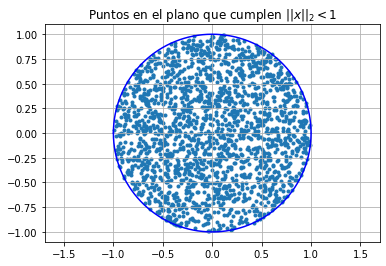

In [2]:
#Definición de norma2
f=lambda x: np.sqrt(x[:,0]**2 + x[:,1]**2) #definición de norma2

density=1e-5
density_p=int(2.5*10**3)

#Definción de variables
x=np.arange(-1,1,density)
y1=np.sqrt(1-x**2)
y2=-np.sqrt(1-x**2)
x_p=np.random.uniform(-1,1,(density_p,2))
ind=f(x_p)<1
x_p_subset=x_p[ind]

#Gráfica
plt.scatter(x_p_subset[:,0],x_p_subset[:,1],marker='.')
plt.plot(x, y1, 'b', x, y2, 'b')
plt.title('Puntos en el plano que cumplen $||x||_2 < 1$')
plt.grid()
plt.axis('equal')

plt.show()

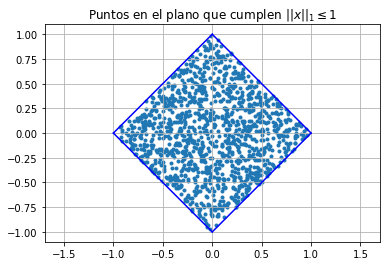

In [3]:
#Definición de norma1
f=lambda x:np.abs(x[:,0]) + np.abs(x[:,1])

density=1e-5
density_p=int(2.5*10**3)

x1=np.arange(0,1,density)
x2=np.arange(-1,0,density)
y1=1-x1
y2=1+x2
y3=x1-1
y4=-1-x2
x_p=np.random.uniform(-1,1,(density_p,2))
ind=f(x_p)<=1
x_p_subset=x_p[ind]

plt.plot(x1,y1,'b',x2,y2,'b',x1,y3,'b',x2,y4,'b')
plt.scatter(x_p_subset[:,0],x_p_subset[:,1],marker='.')
plt.title('Puntos en el plano que cumplen $||x||_1 \leq 1$')
plt.grid()
plt.axis('equal')

plt.show()

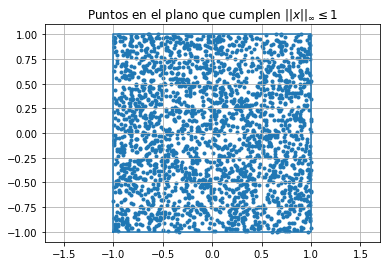

In [4]:
#Definición de norma infinito
f=lambda x:np.max(np.abs(x),axis=1)

point1 = (-1, -1)
point2 = (-1, 1)
point3 = (1, 1)
point4 = (1, -1)
point5 = point1
arr = np.row_stack((point1, point2,
                    point3, point4,
                    point5))

density_p=int(2.5*10**3)

x_p=np.random.uniform(-1,1,(density_p,2))
ind=f(x_p)<=1
x_p_subset=x_p[ind]

plt.scatter(x_p_subset[:,0],x_p_subset[:,1],marker='.')
plt.plot(arr[:,0], arr[:,1])
plt.title('Puntos en el plano que cumplen $||x||_{\infty} \leq 1$')
plt.grid()
plt.axis('equal')

plt.show()

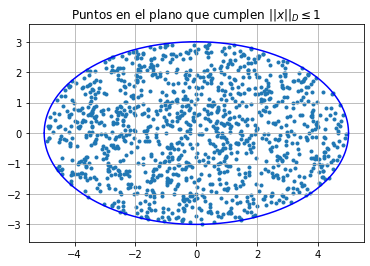

In [5]:
d1_inv=1/5
d2_inv=1/3

f=lambda x: np.sqrt((d1_inv*x[:,0])**2 + (d2_inv*x[:,1])**2) #definición de norma2

density=1e-5
density_p=int(2.5*10**3)

x=np.arange(-1/d1_inv,1/d1_inv,density)
y1=1.0/d2_inv*np.sqrt(1-(d1_inv*x)**2)
y2=-1.0/d2_inv*np.sqrt(1-(d1_inv*x)**2)
x_p=np.random.uniform(-1/d1_inv,1/d1_inv,(density_p,2))
ind=f(x_p)<=1
x_p_subset=x_p[ind]

plt.plot(x,y1,'b',x,y2,'b')
plt.scatter(x_p_subset[:,0],x_p_subset[:,1],marker='.')
plt.title('Puntos en el plano que cumplen $||x||_D \leq 1$')
plt.grid()
plt.axis('equal')

plt.show()

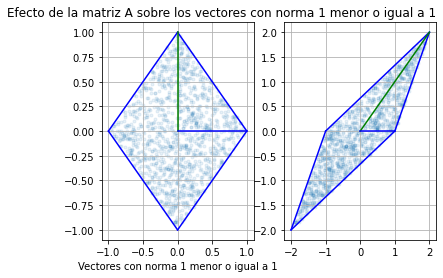

In [22]:
#Función de norma1
f = lambda x:np.abs(x[:,0]) + np.abs(x[:,1])

#Matriz A
A=np.array([[1,2],[0,2]])

#Puntos de norma1 sin mapear
x_p=np.random.uniform(-1,1,(density_p,2))
ind=f(x_p)<=1
x_p_subset=x_p[ind]

density=1e-5

x1 = np.arange(0,1,density)
x2 = np.arange(-1,0,density)
x1_y1 = np.column_stack((x1,1-x1))
x2_y2 = np.column_stack((x2,1+x2))
x1_y3 = np.column_stack((x1,x1-1))
x2_y4 = np.column_stack((x2,-1-x2))

apply_A = lambda vec : np.transpose(A@np.transpose(vec))

A_to_vector_1 = apply_A(x1_y1)
A_to_vector_2 = apply_A(x2_y2)
A_to_vector_3 = apply_A(x1_y3)
A_to_vector_4 = apply_A(x2_y4)


#Gráfica de puntos sin mapear
plt.subplot(1,2,1)
plt.scatter(x_p_subset[:,0],x_p_subset[:,1],marker='.', alpha=0.1)
plt.plot(x1_y1[:,0],x1_y1[:,1],'b',
         x2_y2[:,0],x2_y2[:,1],'b',
         x1_y3[:,0],x1_y3[:,1],'b',
         x2_y4[:,0],x2_y4[:,1],'b')

e1 = np.array([[0,0],
               [1, 0]])
e2 = np.array([[0, 0],
               [0, 1]])

plt.plot(e2[:,0], e2[:,1],'g',
         e1[:,0], e1[:,1],'b')
plt.xlabel('Vectores con norma 1 menor o igual a 1')
plt.grid()

#Gráfica de puntos mapeados
plt.subplot(1,2,2)
plt.scatter(apply_A(x_p_subset)[:,0] ,apply_A(x_p_subset)[:,1],marker='.', alpha=0.1)
plt.scatter()
plt.plot(A_to_vector_1[:,0],A_to_vector_1[:,1],'b',
         A_to_vector_2[:,0],A_to_vector_2[:,1],'b',
         A_to_vector_3[:,0],A_to_vector_3[:,1],'b',
         A_to_vector_4[:,0],A_to_vector_4[:,1],'b')

A_to_vector_e2 = apply_A(e2)
A_to_vector_e1 = apply_A(e1)

plt.plot(A_to_vector_e2[:,0],A_to_vector_e2[:,1],'g',A_to_vector_e1[:,0], A_to_vector_e1[:,1],'b')
plt.grid()
plt.title('Efecto de la matriz A sobre los vectores con norma 1 menor o igual a 1', loc='right')

plt.show()

In [23]:
#Cálculo de la norma mapeada
np.linalg.norm(x=A, ord=1)

4.0

In [16]:
apply_A(x_p_subset).shape

(1223, 2)

In [26]:
#Norma2 calculada desde la matriz A
f"{np.linalg.norm(x=A, ord=2):.4f}"

'2.9208'

In [27]:
#u: Vectores singulares izquierdos de A
#s: Valores singulares de A
#v: Vectores singulares derechos de A

u, s, v_t = np.linalg.svd(A)

s

array([2.92080963, 0.68474165])

In [47]:
#Obteniendo A desde u, s, v
u * (s @ v_t), A

(array([[1.00000000e+00, 2.00000000e+00],
        [5.96564554e-17, 2.00000000e+00]]),
 array([[1, 2],
        [0, 2]]))

In [30]:
u[:,0] * s[0]

array([2.18966723, 1.9329993 ])

In [32]:
#Norma2 calculada desde los vectores singulares
np.linalg.norm(u[:,0] * s[0], ord=2)

2.9208096264818897